In [2]:
# Jupyter Notebook: Risk Management and Profitability Analysis for Parlay Bets

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.precision', 4)
%matplotlib inline


Introduction

In this notebook, we will explore the reserves required by a sportsbook under different scenarios. Specifically, we will:

* Plot the reserves required vs. betting odds without margin or hedging.
* Plot the reserves required with hedging at different numbers of legs.
* Plot the reserves required at different margins taken.

For simplicity, we will set all wagers to $1. We will analyze how hedging strategies and margins impact the reserves needed to cover potential payouts.

1. Reserves Required vs. Betting Odds Without Margin or Hedging

In this section, we calculate the reserves required per $1 bet across a range of betting odds without considering any margin or hedging.
Assumptions

    Wager Amount (W): $1
    Betting Odds (O): Range from 1.1 to 1000
    No Margin: The sportsbook does not apply any margin.
    No Hedging: The sportsbook does not hedge any bets.

Calculations

    Potential Payout: Payout=W×O

    Reserves Required: Reserves=Payout−W=W×(O−1)

In [23]:
# Define the range of betting odds
odds_range = np.logspace(np.log10(2), np.log10(1000), num=500)

# Wager amount
W = 1.0  # $1

# Calculate reserves required
reserves_no_margin_no_hedging = W * (odds_range - 1)


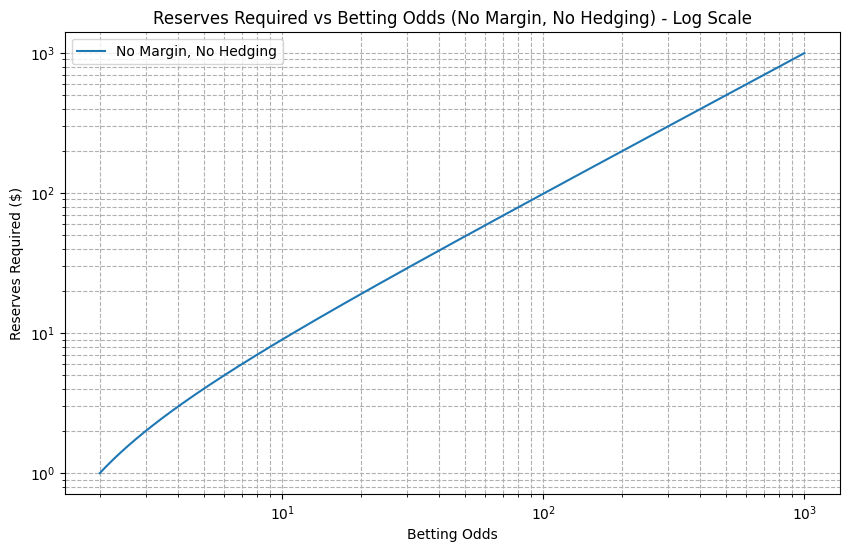

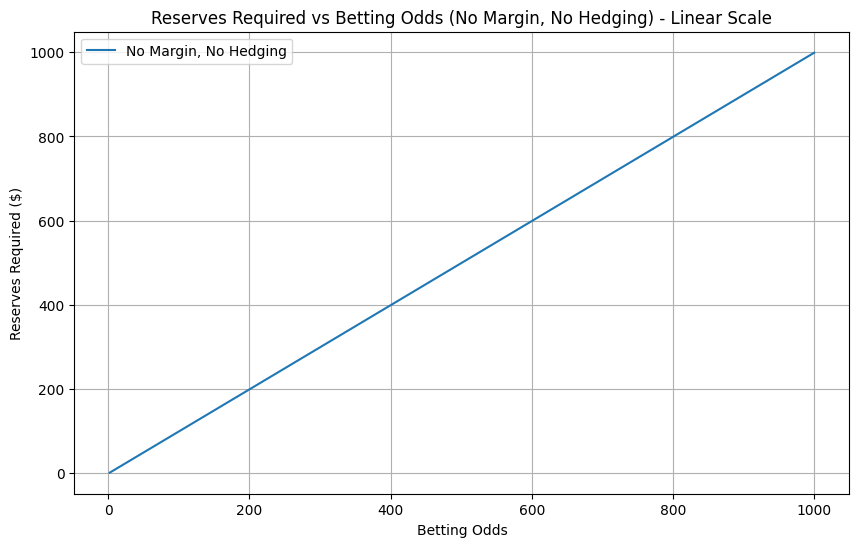

In [24]:
# Plot Reserves Required vs Betting Odds (Log Scale)
plt.figure(figsize=(10, 6))
plt.plot(odds_range, reserves_no_margin_no_hedging, label='No Margin, No Hedging')
plt.title('Reserves Required vs Betting Odds (No Margin, No Hedging) - Log Scale')
plt.xlabel('Betting Odds')
plt.ylabel('Reserves Required ($)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()
# Plot Reserves Required vs Betting Odds (Linear Scale)
plt.figure(figsize=(10, 6))
plt.plot(odds_range, reserves_no_margin_no_hedging, label='No Margin, No Hedging')
plt.title('Reserves Required vs Betting Odds (No Margin, No Hedging) - Linear Scale')
plt.xlabel('Betting Odds')
plt.ylabel('Reserves Required ($)')
plt.grid(True)
plt.legend()
plt.show()


## Analysis

This plot shows how the reserves required increase with the betting odds when no margin or hedging is applied. Both axes are on a logarithmic scale to accommodate the wide range of values.

2. Reserves Required with Hedging at Different Number of Legs

In this section, we analyze how hedging impacts the reserves required when offering parlays (bets combining multiple legs/events).
Assumptions

    Wager Amount (W): $1
    Betting Odds (O): Range from 1.1 to 1000
    No Margin: The sportsbook does not apply any margin.
    Hedging Strategy: The sportsbook hedges by placing bets on each leg of the parlay.

Hedging Implementation

We consider hedging strategies for parlays with different numbers of legs. The idea is that by hedging each leg, the sportsbook can reduce the potential net loss.
Calculations

For each number of legs:

    Assume Each Leg Has Equal Odds: For simplicity, we assume each leg has equal odds such that the combined odds equal the betting odds.

    Calculate Individual Leg Odds:
    Oleg=O1/nlegs
    Oleg​=O1/nlegs​

    Potential Payout from Hedging Each Leg:
        Hedging Bet Amount per Leg: Whedge=WWhedge​=W
        Potential Return per Leg: Returnleg=Whedge×OlegReturnleg​=Whedge​×Oleg​

    Total Hedging Gains: Sum of gains from all legs.

    Net Reserves Required:
    Reserves=(Payout to User−Total Hedging Gains)−W
    Reserves=(Payout to User−Total Hedging Gains)−W

In [17]:
# Define the number of legs to analyze
num_legs_list = [2, 3, 5, 10]

# Initialize a dictionary to store reserves for different numbers of legs
reserves_with_hedging = {}

for n_legs in num_legs_list:
    # Calculate individual leg odds
    leg_odds = odds_range ** (1 / n_legs)
    
    # Hedging bet amount per leg
    W_hedge = W  # $1 per leg
    
    # Potential return per leg
    return_per_leg = W_hedge * leg_odds
    
    # Total hedging gains (assuming all legs win)
    total_hedging_gains = (return_per_leg - W_hedge) * n_legs  # Net gain per leg times number of legs
    
    # Potential payout to user
    payout_to_user = W * odds_range
    
    # Net reserves required
    reserves = (payout_to_user - total_hedging_gains) - W  # Subtract user's wager
    reserves_with_hedging[n_legs] = reserves


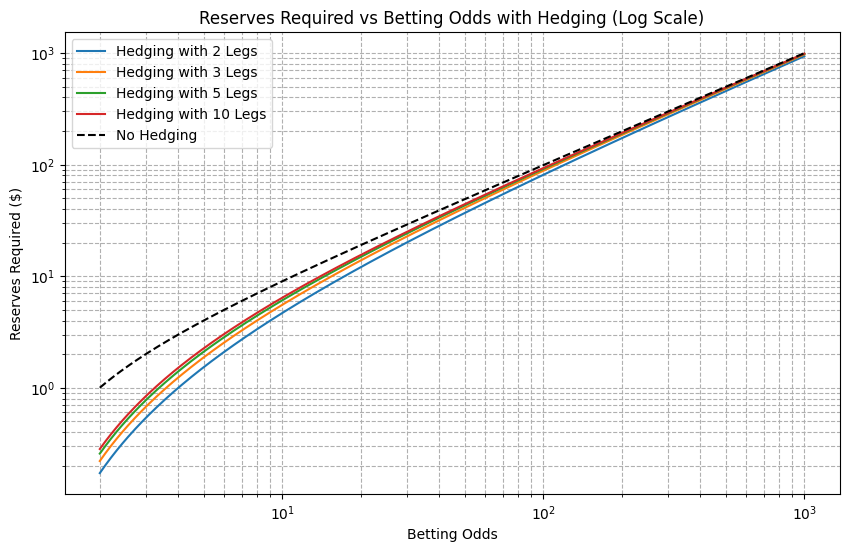

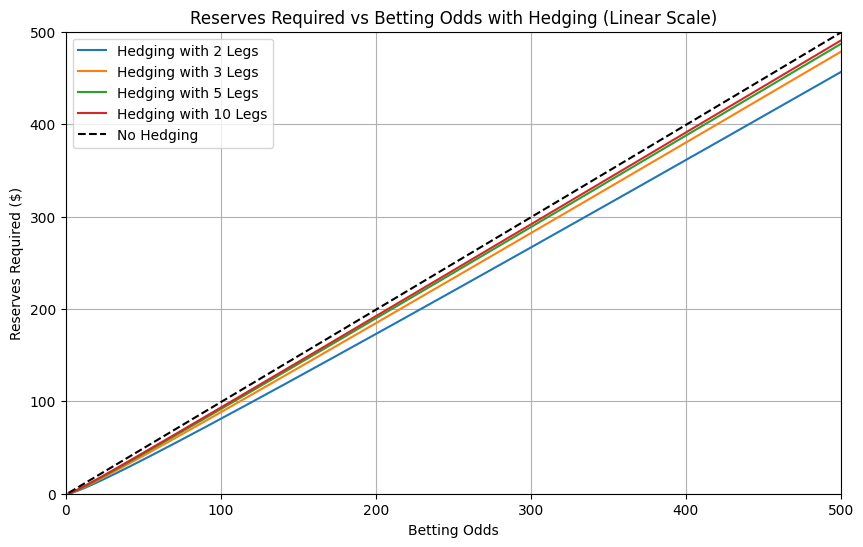

In [29]:
# Plot Reserves Required vs Betting Odds with Hedging at Different Legs (Log Scale)
plt.figure(figsize=(10, 6))

# Plot for each number of legs
for n_legs, reserves in reserves_with_hedging.items():
    plt.plot(odds_range, reserves, label=f'Hedging with {n_legs} Legs')
    
# Plot without hedging for comparison
plt.plot(odds_range, reserves_no_margin_no_hedging, label='No Hedging', linestyle='--', color='black')

plt.title('Reserves Required vs Betting Odds with Hedging (Log Scale)')
plt.xlabel('Betting Odds')
plt.ylabel('Reserves Required ($)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

# Plot Reserves Required vs Betting Odds with Hedging at Different Legs (Linear Scale)
plt.figure(figsize=(10, 6))

# Plot for each number of legs
for n_legs, reserves in reserves_with_hedging.items():
    plt.plot(odds_range, reserves, label=f'Hedging with {n_legs} Legs')
    
# Plot without hedging for comparison
plt.plot(odds_range, reserves_no_margin_no_hedging, label='No Hedging', linestyle='--', color='black')

plt.title('Reserves Required vs Betting Odds with Hedging (Linear Scale)')
plt.xlabel('Betting Odds')
plt.ylabel('Reserves Required ($)')
plt.xlim(0,500)
plt.ylim(0,500)
plt.grid(True)
plt.legend()
plt.show()


## Analysis



3. Reserves Required at Different Margins Taken

In this section, we analyze how applying different margins impacts the reserves required.
Assumptions

    Wager Amount (W): $1
    Betting Odds (O): Range from 1.1 to 1000
    Margins: Range from 0.5% to 30%
    No Hedging: The sportsbook does not hedge any bets.

Calculations

For each margin:

    Adjusted Odds:
    Oadj=O / 1+Margin

    Potential Payout:
    Payout=W×Oadj

    Reserves Required:
    Reserves=Payout−W

In [19]:
# Define margins to analyze
margins = [0.005, 0.05, 0.10, 0.20, 0.30]  # 0.5% to 30%

# Initialize a dictionary to store reserves for different margins
reserves_with_margin = {}

for margin in margins:
    # Adjusted odds
    O_adj = odds_range / (1 + margin)
    
    # Potential payout
    payout = W * O_adj
    
    # Reserves required
    reserves = payout - W
    reserves_with_margin[margin] = reserves


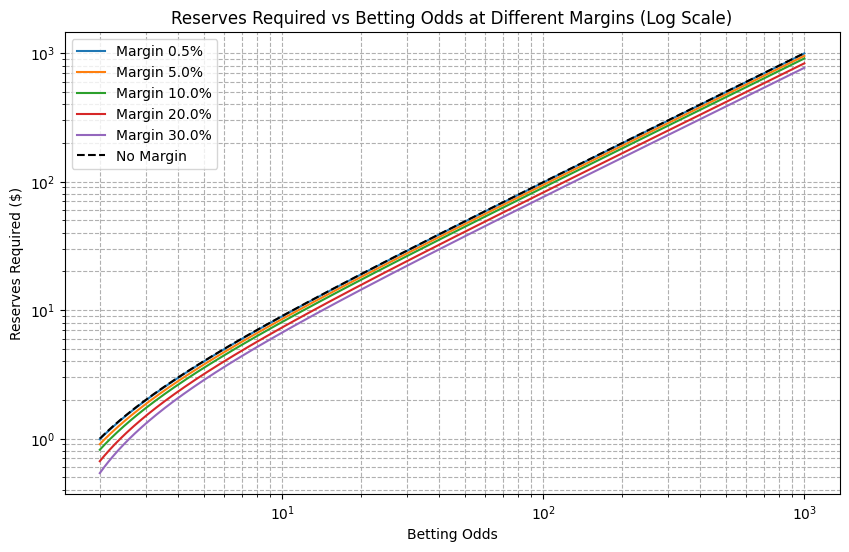

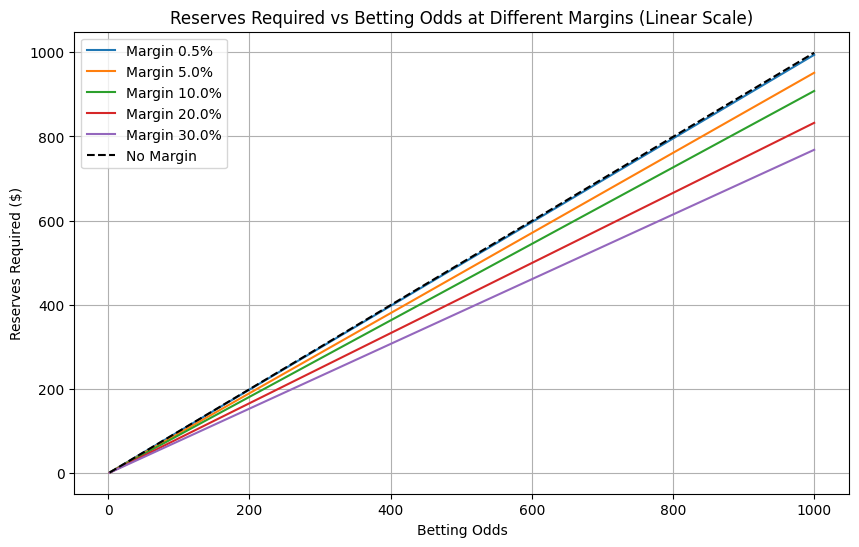

In [30]:
# Plot Reserves Required vs Betting Odds at Different Margins (Log Scale)
plt.figure(figsize=(10, 6))

# Plot for each margin
for margin, reserves in reserves_with_margin.items():
    plt.plot(odds_range, reserves, label=f'Margin {margin*100}%')
    
# Plot without margin for comparison
plt.plot(odds_range, reserves_no_margin_no_hedging, label='No Margin', linestyle='--', color='black')

plt.title('Reserves Required vs Betting Odds at Different Margins (Log Scale)')
plt.xlabel('Betting Odds')
plt.ylabel('Reserves Required ($)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()


# Plot Reserves Required vs Betting Odds at Different Margins (Linear Scale)
plt.figure(figsize=(10, 6))

# Plot for each margin
for margin, reserves in reserves_with_margin.items():
    plt.plot(odds_range, reserves, label=f'Margin {margin*100}%')
    
# Plot without margin for comparison
plt.plot(odds_range, reserves_no_margin_no_hedging, label='No Margin', linestyle='--', color='black')

plt.title('Reserves Required vs Betting Odds at Different Margins (Linear Scale)')
plt.xlabel('Betting Odds')
plt.ylabel('Reserves Required ($)')
plt.grid(True)
plt.legend()
plt.show()


## Analysis



4. Combined Analysis

For a comprehensive view, we can combine the impact of both hedging and margins on the reserves required. We will plot the best and worse hedging cases so that we have a range.

Best-Case Scenario

    Margin: 30% (0.30)
    Hedging: Hedging with 2 legs

Worst-Case Scenario

    Margin: 0% (0.00)
    Hedging: Hedging with 10 legs

We will plot these scenarios and fill the area between them to visualize the range of reserves required.

Calculations

For each scenario, we will:

    Adjust the Odds with Margin:
    Oadj=O/1+Margin

    Calculate Individual Leg Odds:
    Oleg=Oadj1/nlegs
    Oleg​=Oadj1/nlegs​​

    Potential Return per Leg:
    Returnleg=Whedge×Oleg
    Returnleg​=Whedge​×Oleg​

    Total Hedging Gains:
    Total Hedging Gains=(Returnleg−Whedge)×nlegs
    Total Hedging Gains=(Returnleg​−Whedge​)×nlegs​

    Potential Payout to User:
    Payout to User=W×Oadj
    Payout to User=W×Oadj​

    Net Reserves Required:
    Reserves=(Payout to User−Total Hedging Gains)−W
    Reserves=(Payout to User−Total Hedging Gains)−W

In [32]:
# Best-Case Scenario Parameters
best_margin = 0.30  # 30%
best_n_legs = 2

# Adjusted odds
O_adj_best = odds_range / (1 + best_margin)

# Calculate individual leg odds (adjusted)
leg_odds_best = O_adj_best ** (1 / best_n_legs)

# Hedging bet amount per leg
W_hedge = W  # $1 per leg

# Potential return per leg
return_per_leg_best = W_hedge * leg_odds_best

# Total hedging gains (assuming all legs win)
total_hedging_gains_best = (return_per_leg_best - W_hedge) * best_n_legs  # Net gain per leg times number of legs

# Potential payout to user
payout_to_user_best = W * O_adj_best

# Net reserves required for best-case scenario
reserves_best = (payout_to_user_best - total_hedging_gains_best) - W  # Subtract user's wager


# Worst-Case Scenario Parameters
worst_margin = 0.00  # 0%
worst_n_legs = 10

# Adjusted odds
O_adj_worst = odds_range / (1 + worst_margin)  # Since margin is 0, O_adj_worst = odds_range

# Calculate individual leg odds (adjusted)
leg_odds_worst = O_adj_worst ** (1 / worst_n_legs)

# Hedging bet amount per leg
W_hedge = W  # $1 per leg

# Potential return per leg
return_per_leg_worst = W_hedge * leg_odds_worst

# Total hedging gains (assuming all legs win)
total_hedging_gains_worst = (return_per_leg_worst - W_hedge) * worst_n_legs  # Net gain per leg times number of legs

# Potential payout to user
payout_to_user_worst = W * O_adj_worst

# Net reserves required for worst-case scenario
reserves_worst = (payout_to_user_worst - total_hedging_gains_worst) - W  # Subtract user's wager


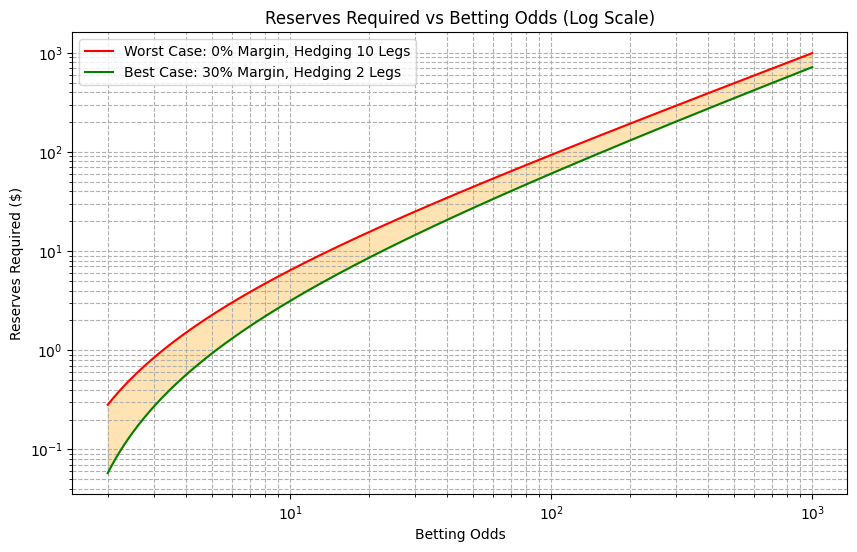

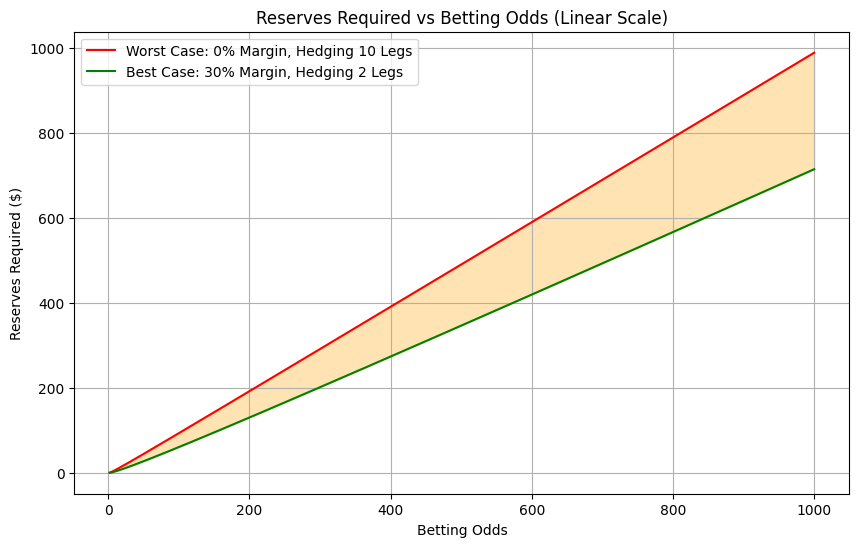

In [33]:
# Plot Reserves Required vs Betting Odds for Best and Worst Cases (Log Scale)
plt.figure(figsize=(10, 6))

# Plot worst-case scenario
plt.plot(odds_range, reserves_worst, label='Worst Case: 0% Margin, Hedging 10 Legs', color='red')

# Plot best-case scenario
plt.plot(odds_range, reserves_best, label='Best Case: 30% Margin, Hedging 2 Legs', color='green')

# Fill the area between best and worst cases
plt.fill_between(odds_range, reserves_best, reserves_worst, color='orange', alpha=0.3)

plt.title('Reserves Required vs Betting Odds (Log Scale)')
plt.xlabel('Betting Odds')
plt.ylabel('Reserves Required ($)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

# Plot Reserves Required vs Betting Odds for Best and Worst Cases (Linear Scale)
plt.figure(figsize=(10, 6))

# Plot worst-case scenario
plt.plot(odds_range, reserves_worst, label='Worst Case: 0% Margin, Hedging 10 Legs', color='red')

# Plot best-case scenario
plt.plot(odds_range, reserves_best, label='Best Case: 30% Margin, Hedging 2 Legs', color='green')

# Fill the area between best and worst cases
plt.fill_between(odds_range, reserves_best, reserves_worst, color='orange', alpha=0.3)

plt.title('Reserves Required vs Betting Odds (Linear Scale)')
plt.xlabel('Betting Odds')
plt.ylabel('Reserves Required ($)')
plt.grid(True)
plt.legend()
plt.show()


## Takeaways
